In [3]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
placements = pd.read_csv("Placement_Data_Full_Class.csv")
placements

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [5]:
# DATA CLEANING 
placements.fillna(0, inplace=True)
placements

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [6]:
# GENDER WISE PLACEMENTS
not_placed = placements[placements['status']=='Not Placed']
not_placed['gender'].value_counts() # 39 Males and 28 Females - unemployed 
placements['gender'].value_counts() # 139 Males and 76 Females - total

gender
M    139
F     76
Name: count, dtype: int64

In [7]:
# Define the data
employed_males = 139 - 39 # 100
total_males = 139

employed_females = 76 - 28 # 48
total_females = 76

# Calculate employment rates
employment_rate_males = employed_males / total_males
employment_rate_females = employed_females / total_females

print("Employment rate for males:", employment_rate_males)
print("Employment rate for females:", employment_rate_females)
# Female employment rate is lower than male employment rate 

Employment rate for males: 0.7194244604316546
Employment rate for females: 0.631578947368421


In [8]:
# EDU BOARDS + PLACEMENTS
central_placed =  placements[(placements['status']=='Placed')&(placements['hsc_b']=='Central')&(placements['ssc_b']=='Central')]
central_placed['gender'].value_counts() # females - 18, males - 35, total - 53
others_placed =  placements[(placements['status']=='Placed')&(placements['hsc_b']=='Others')&(placements['ssc_b']=='Others')]
others_placed['gender'].value_counts() # females - 21, males - 45, total - 66
total_placements = placements['status'].value_counts()
total_placements # Placed - 148, Not Placed - 67
# Placements from a fixed edu background = other OR central = 119
# Placements from a mix edu background = other + central = 29
# Placements from other edu boards > central

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [9]:
avg_salary = placements[placements['status']=='Placed']['salary'].mean() # CALC AVG SALARY
avg_salary # 288655

288655.4054054054

In [10]:
# GENDER + AVG SALARY
# 148 people are employed 
earnings_abv_avg_salary = placements[(placements['status']=='Placed') & (placements['salary']>=288655)]
earnings_abv_avg_salary['gender'].value_counts() # 39 - Males, 13 - Females 
# 52 people earn abv the avg salary out of 148 employed people 

earnings_blw_avg_salary = placements[(placements['status']=='Placed') & (placements['salary']<288655)]
earnings_blw_avg_salary['gender'].value_counts() # 61 - Males, 35 - Females 
# 96 people earn below the avg salary ot of 148 employed people 
# 39 Males and 28 Females - unemployed = 67
# 100 Males and 48 Females - employed = 148

gender
M    61
F    35
Name: count, dtype: int64

In [11]:
# DEGREE + GENDER
female_degree = placements[placements['gender']=='F']
female_degree['degree_t'].value_counts() 
# Comm&Mgmt    53
# Sci&Tech     17
# Others   6

male_degree = placements[placements['gender']=='M']
male_degree['degree_t'].value_counts() 
# Comm&Mgmt    92
# Sci&Tech     42
# Others        5

degree_t
Comm&Mgmt    92
Sci&Tech     42
Others        5
Name: count, dtype: int64

In [12]:
# Avg Male Earnings - Degrees 
male_degree_earnings = placements[(placements['gender']=='M') & (placements['degree_t']=='Comm&Mgmt') & (placements['status']=='Placed')]
mean_male_earnings = male_degree_earnings['salary'].mean()
mean_male_earnings # 284521
male_degree_earnings = placements[(placements['gender']=='M') & (placements['degree_t']=='Sci&Tech') & (placements['status']=='Placed')]
mean_male_earnings = male_degree_earnings['salary'].mean()
mean_male_earnings # 333633
male_degree_earnings = placements[(placements['gender']=='M') & (placements['degree_t']=='Others') & (placements['status']=='Placed')]
mean_male_earnings = male_degree_earnings['salary'].mean()
mean_male_earnings # 250000

250000.0

In [13]:
# Avg Female Earnings - Degrees 
female_degree_earnings = placements[(placements['gender']=='F') & (placements['degree_t']=='Comm&Mgmt') & (placements['status']=='Placed')]
mean_female_earnings = female_degree_earnings['salary'].mean()
mean_female_earnings # 266303
female_degree_earnings = placements[(placements['gender']=='F') & (placements['degree_t']=='Sci&Tech') & (placements['status']=='Placed')]
mean_female_earnings = female_degree_earnings['salary'].mean()
mean_female_earnings # 262727
female_degree_earnings = placements[(placements['gender']=='F') & (placements['degree_t']=='Others') & (placements['status']=='Placed')]
mean_female_earnings = female_degree_earnings['salary'].mean()
mean_female_earnings # 288000

288000.0

In [14]:
# Degree Wise Avg Salaries 
comm_degree_earnings = placements[(placements['degree_t']=='Comm&Mgmt') & (placements['status']=='Placed')]
mean_comm_earnings = comm_degree_earnings['salary'].mean()
mean_comm_earnings # 196000.0
tech_degree_earnings = placements[(placements['degree_t']=='Sci&Tech') & (placements['status']=='Placed')]
mean_tech_earnings = tech_degree_earnings['salary'].mean()
mean_tech_earnings # 218627
other_degree_earnings = placements[(placements['degree_t']=='Others') & (placements['status']=='Placed')]
mean_other_earnings = other_degree_earnings['salary'].mean()
mean_other_earnings # 127454

280400.0

In [15]:
# Work Experience + Salary
exp_earnings = placements[(placements['workex']=='Yes') & (placements['status']=='Placed')]
mean_exp_earnings = exp_earnings['salary'].mean()
mean_exp_earnings # 303265

exp_earnings = placements[(placements['workex']=='No') & (placements['status']=='Placed')]
mean_exp_earnings = exp_earnings['salary'].mean()
mean_exp_earnings # 277523

277523.8095238095

In [16]:
# Work Experience + Placement + Gender 
exp_placement = placements[(placements['workex']=='No') & (placements['status']=='Placed')] # 84
exp_placement['gender'].value_counts()
# M    54
# F    30

exp_placement = placements[(placements['workex']=='Yes') & (placements['status']=='Placed')] #64 
exp_placement['gender'].value_counts()
# M    46
# F    18

gender
M    46
F    18
Name: count, dtype: int64

In [17]:
# Placement + Specialization
spec_placement = placements[(placements['specialisation']=='Mkt&HR') & (placements['status']=='Placed')]
spec_placement['gender'].value_counts()
# M    33
# F    20

spec_placement = placements[(placements['specialisation']=='Mkt&Fin') & (placements['status']=='Placed')]
spec_placement['gender'].value_counts()
# M    67
# F    28

gender
M    67
F    28
Name: count, dtype: int64

In [18]:
# Salary + Specialization
spec_placement = placements[(placements['specialisation']=='Mkt&Fin') & (placements['status']=='Placed')]
spec_placement['salary'].mean() # 298852
spec_placement = placements[(placements['specialisation']=='Mkt&HR') & (placements['status']=='Placed')]
spec_placement['salary'].mean() # 270377

270377.358490566

In [19]:
# Specialization + Gender
spec_placement = placements[(placements['specialisation']=='Mkt&Fin') & (placements['status']=='Placed')]
spec_placement['gender'].value_counts()
# gender - mkt fin
# M    67
# F    28
spec_placement = placements[(placements['specialisation']=='Mkt&HR') & (placements['status']=='Placed')]
spec_placement['gender'].value_counts()
# gender
# M    33
# F    20

gender
M    33
F    20
Name: count, dtype: int64

In [20]:
# Specialization + Gender + Salary
# MALES + MKT FIN
spec_placement = placements[(placements['specialisation']=='Mkt&Fin') & (placements['status']=='Placed') & (placements['gender']=='M')]
spec_placement['salary'].mean() # 307029
# MALES + MKT HR
spec_placement = placements[(placements['specialisation']=='Mkt&HR') & (placements['status']=='Placed') & (placements['gender']=='M')]
spec_placement['salary'].mean() # 282424
# FEMALES + MKT FIN
spec_placement = placements[(placements['specialisation']=='Mkt&Fin') & (placements['status']=='Placed') & (placements['gender']=='F')]
spec_placement['salary'].mean() # 279285
# FEMALES + MKT HR
spec_placement = placements[(placements['specialisation']=='Mkt&HR') & (placements['status']=='Placed') & (placements['gender']=='F')]
spec_placement['salary'].mean() # 250500.0

250500.0

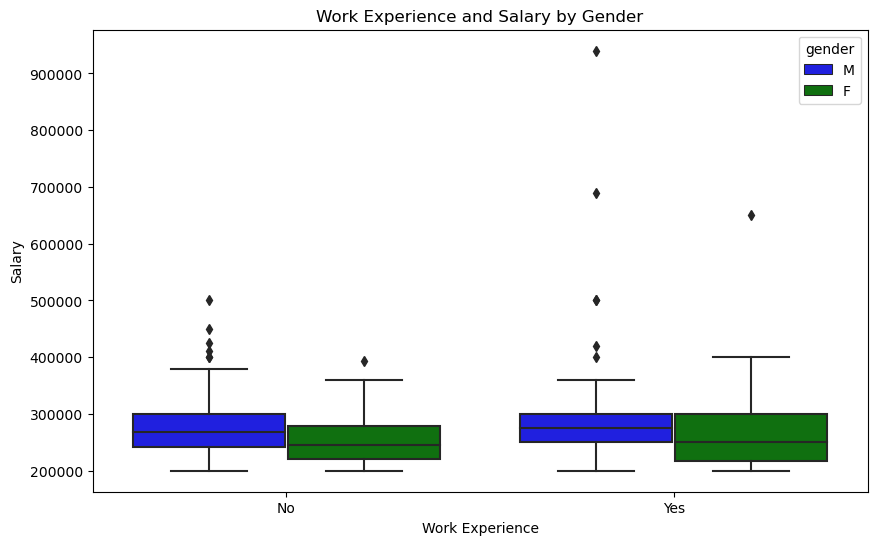

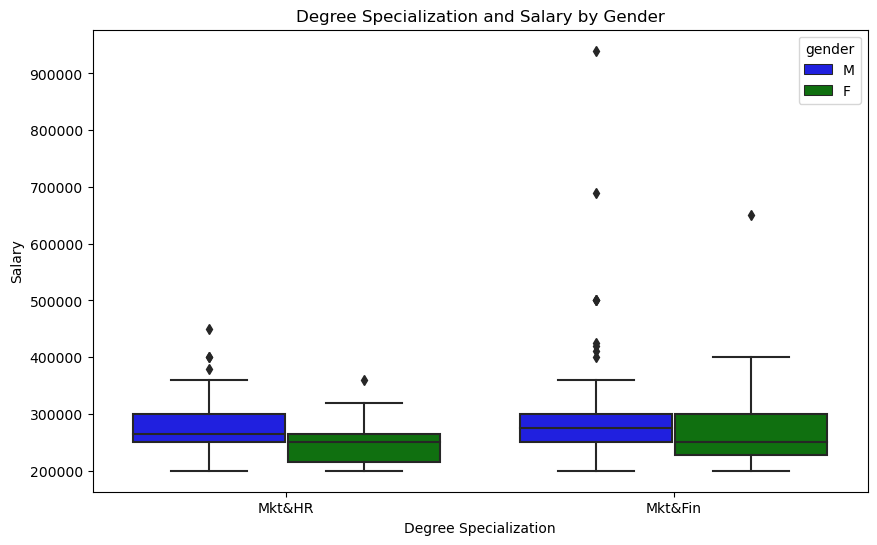

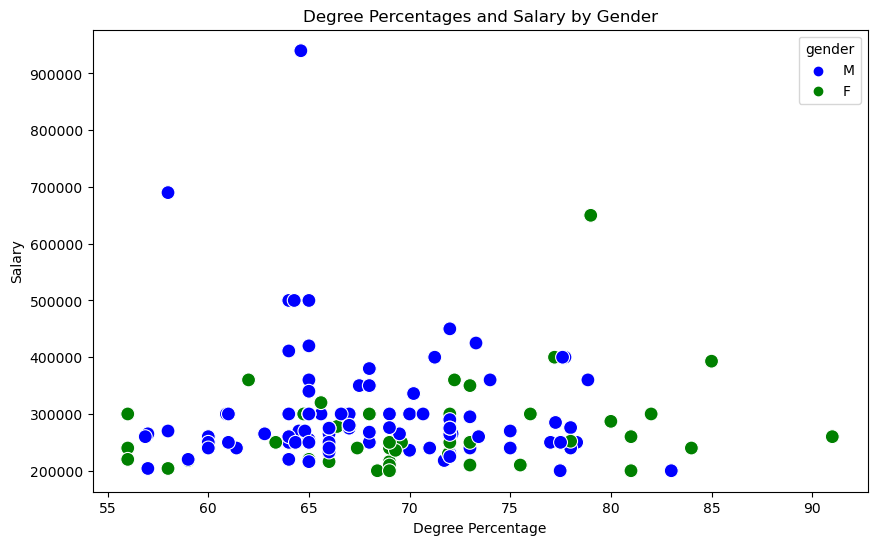

In [68]:
# RESEARCH QUESTION 3
# Adjusting the color palette to use string keys for gender
palette_green_blue_str = {'M': "blue", 'F': "green"}  # Male: Blue, Female: Green

# Ensure the hue order is explicitly set to match the palette keys
hue_order = ['M', 'F']  # Male first, then Female

# Visualization 1: Work Experience and Salary by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x="workex", y="salary", data=placements[placements["salary"] > 0], hue="gender", palette=palette_green_blue_str, hue_order=hue_order)
plt.title("Work Experience and Salary by Gender")
plt.xlabel("Work Experience")
plt.ylabel("Salary")
# No need to manually set legend labels here, as it will correctly use 'M' and 'F' from the data
plt.show()

# Visualization 2: Degree/Specialization and Salary by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x="specialisation", y="salary", data=placements[placements["salary"] > 0], hue="gender", palette=palette_green_blue_str, hue_order=hue_order)
plt.title("Degree Specialization and Salary by Gender")
plt.xlabel("Degree Specialization")
plt.ylabel("Salary")
# The legend will automatically match the hue order and palette
plt.show()

# Visualization 3: Degree Percentages and Salary by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x="degree_p", y="salary", data=placements[placements["salary"] > 0], hue="gender", palette=palette_green_blue_str, hue_order=hue_order, marker="o", s=100)
plt.title("Degree Percentages and Salary by Gender")
plt.xlabel("Degree Percentage")
plt.ylabel("Salary")
# Correct legend automatically generated based on hue and palette
plt.show()

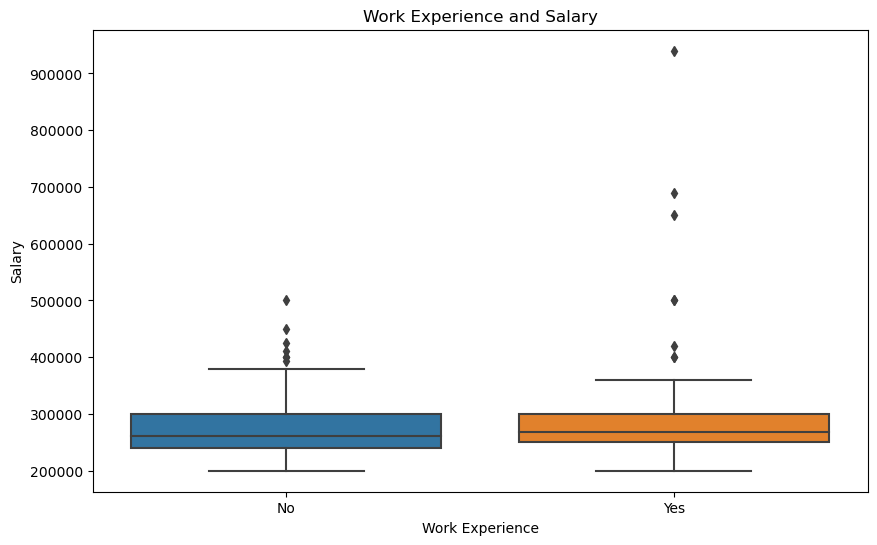

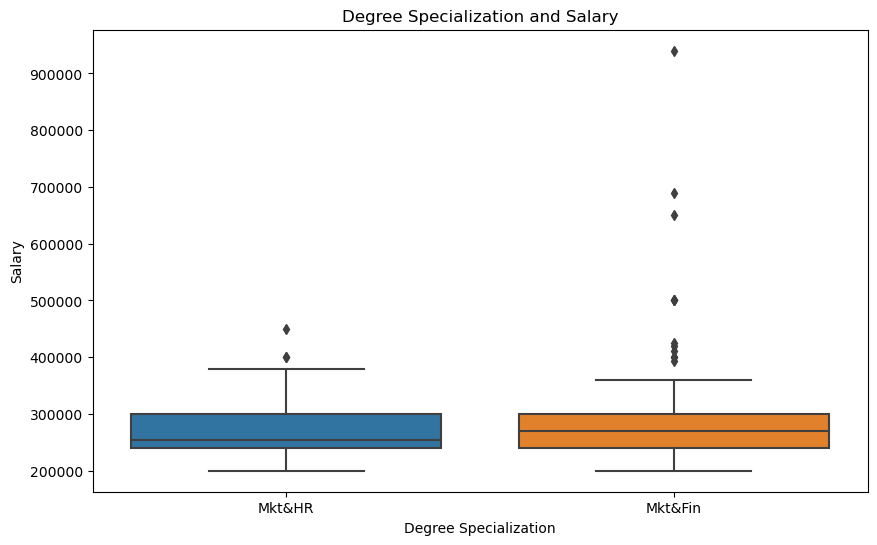

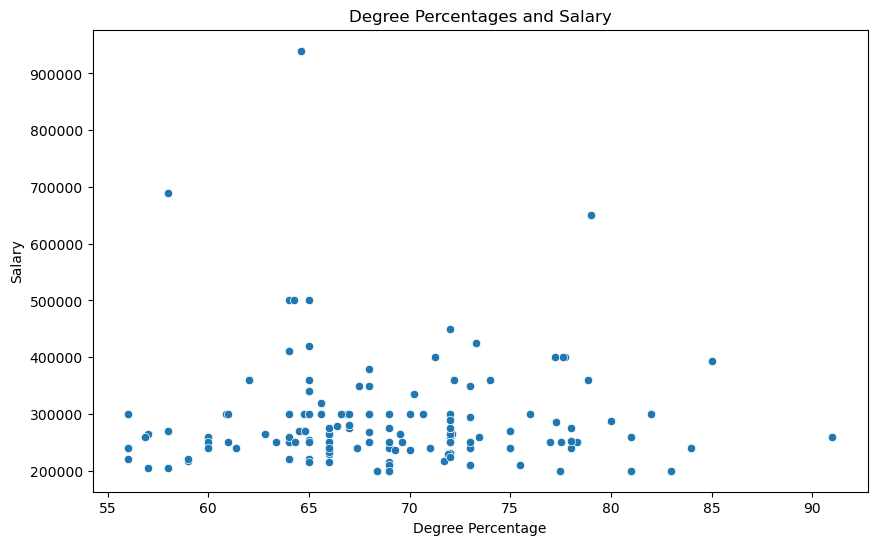

In [71]:
# RESEARCH QUESTION # 2 
# Identifying The Respective Variables' Effect Upon Estimating A Given Individual's Salary.
placed_students = placements[placements["salary"] > 0]

# Visualization 1: Work Experience and Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x="workex", y="salary", data=placed_students)
plt.title("Work Experience and Salary")
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Visualization 2: Degree/Specialization and Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x="specialisation", y="salary", data=placed_students)
plt.title("Degree Specialization and Salary")
plt.xlabel("Degree Specialization")
plt.ylabel("Salary")
plt.show()

# Visualization 3: Degree Percentages and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x="degree_p", y="salary", data=placed_students)
plt.title("Degree Percentages and Salary")
plt.xlabel("Degree Percentage")
plt.ylabel("Salary")
plt.show()

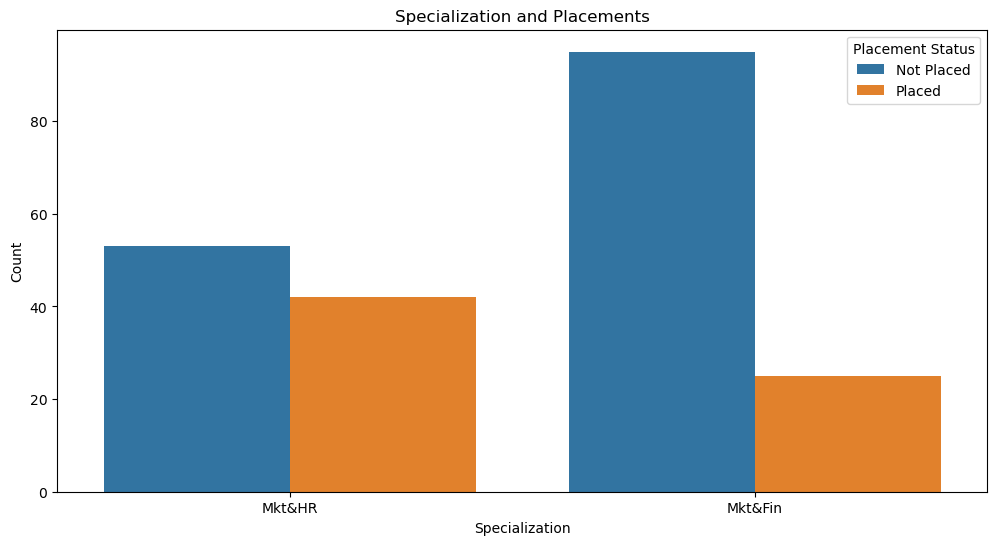

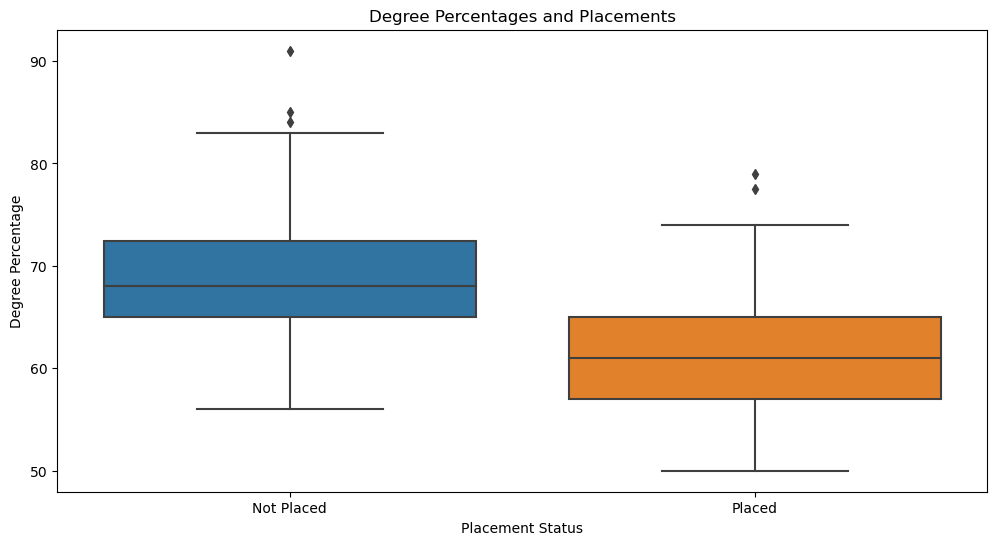

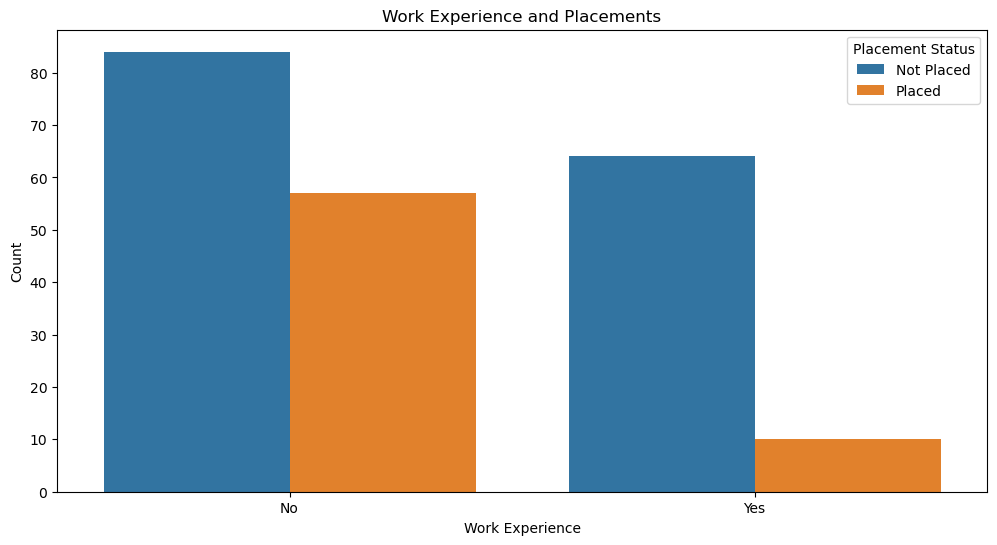

In [70]:
# RESEARCH QUESTION # 1
# Visualization 1: Specialization and Placements
plt.figure(figsize=(12, 6))
sns.countplot(x='specialisation', hue='status', data=placements)
plt.title("Specialization and Placements")
plt.xlabel("Specialization")
plt.ylabel("Count")
plt.legend(title="Placement Status", labels=["Not Placed", "Placed"])
plt.show()

# Visualization 2: Degree Percentages and Placements
plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='degree_p', data=placements)
plt.title("Degree Percentages and Placements")
plt.xlabel("Placement Status")
plt.ylabel("Degree Percentage")
plt.xticks([0, 1], ['Not Placed', 'Placed'])
plt.show()

# Visualization 3: Work Experience and Placements
plt.figure(figsize=(12, 6))
sns.countplot(x='workex', hue='status', data=placements)
plt.title("Work Experience and Placements")
plt.xlabel("Work Experience")
plt.ylabel("Count")
plt.legend(title="Placement Status", labels=["Not Placed", "Placed"])
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


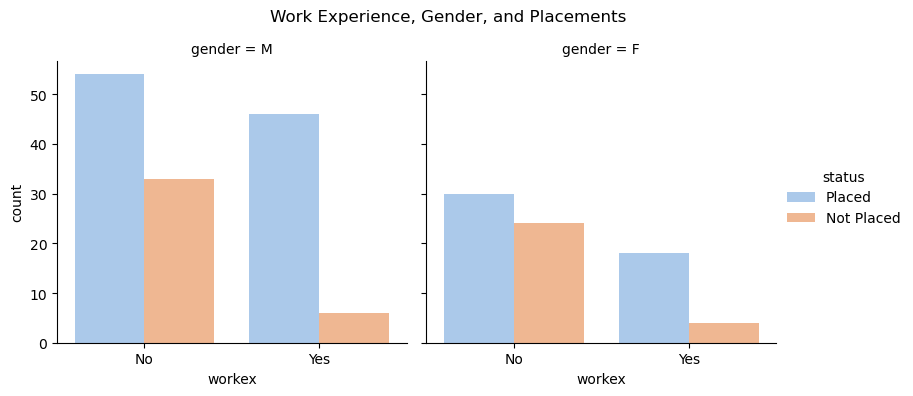

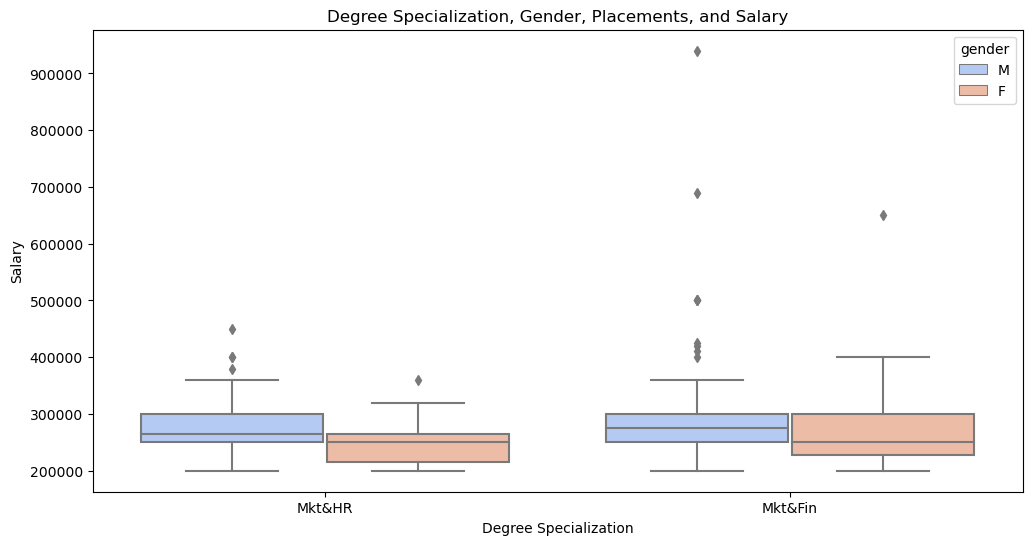

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Overall Employment Rate: 68.84%
Average Salary for Placed Students: $288655.41


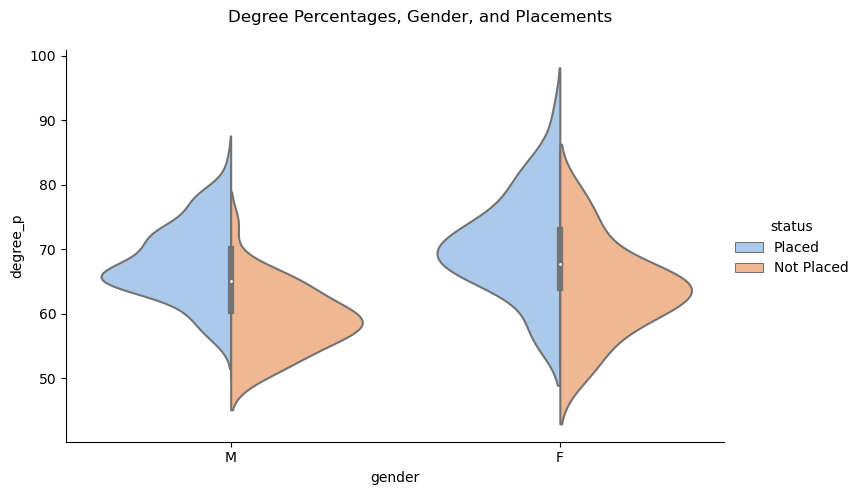

In [72]:
# RESEARCH QUESTION # 3
# 1. Work Experience, Gender, and Placements
g = sns.catplot(x="workex", hue="status", col="gender", data=placements, kind="count", height=4, aspect=1, palette="pastel")
g.fig.suptitle('Work Experience, Gender, and Placements')
plt.subplots_adjust(top=0.85)  # Adjust title position

# 2. Degree/Specialization, Gender, Placements, and Salary
plt.figure(figsize=(12, 6))
sns.boxplot(x='specialisation', y='salary', hue='gender', data=placements[placements['status'] == 'Placed'], palette="coolwarm")
plt.title("Degree Specialization, Gender, Placements, and Salary")
plt.xlabel("Degree Specialization")
plt.ylabel("Salary")
plt.show()

# 3. Degree Percentages, Gender, and Placements
g = sns.catplot(x="gender", y="degree_p", hue="status", data=placements, kind="violin", split=True, palette="pastel", height=5, aspect=1.5)
g.fig.suptitle('Degree Percentages, Gender, and Placements')
plt.subplots_adjust(top=0.9)  # Adjust title position

# 4. Overall Employment Rates and Salary Comparisons
employment_rate = placements['status'].value_counts(normalize=True)['Placed'] * 100
average_salary_placed = placements[placements['status'] == 'Placed']['salary'].mean()

print(f"Overall Employment Rate: {employment_rate:.2f}%")
print(f"Average Salary for Placed Students: ${average_salary_placed:.2f}")